# <CENTER>DRUG CLASSIFICATION

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve,auc,precision_score,confusion_matrix,accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.preprocessing import label_binarize,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from imblearn.over_sampling import SMOTE
from itertools import cycle

In [19]:
data=pd.read_csv('drug200.csv')
data.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
167,57,F,NORMAL,HIGH,14.216,drugX
197,52,M,NORMAL,HIGH,9.894,drugX
184,18,F,HIGH,HIGH,37.188,DrugY
22,47,M,LOW,NORMAL,30.568,DrugY
101,45,F,HIGH,HIGH,12.854,drugA
119,61,F,HIGH,HIGH,25.475,DrugY
35,46,M,NORMAL,NORMAL,7.285,drugX
163,21,F,HIGH,NORMAL,28.632,DrugY
95,36,M,LOW,NORMAL,11.424,drugX
194,46,F,HIGH,HIGH,34.686,DrugY


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [21]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [22]:
data.duplicated().sum()

0

# <center>UNIVARIATE ANALYSIS

## HISTPLOT

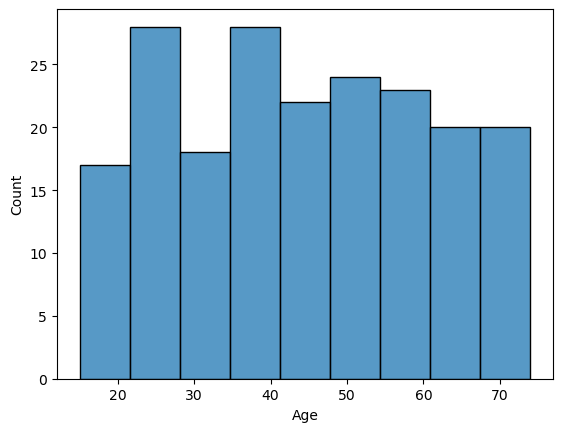

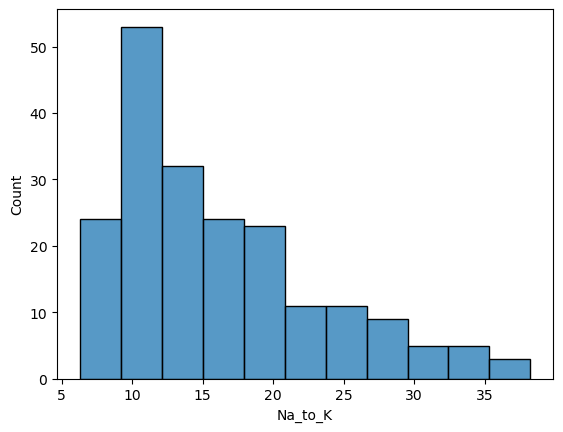

In [23]:
for i in data.columns:
    if data[i].dtype!='object':
        sns.histplot(x=data[i])
        plt.show()

## KDE PLOT

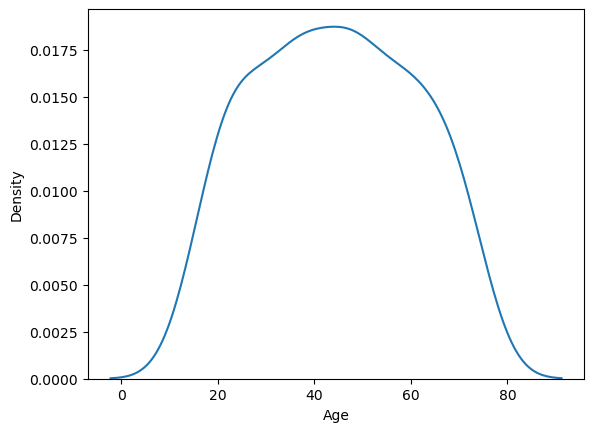

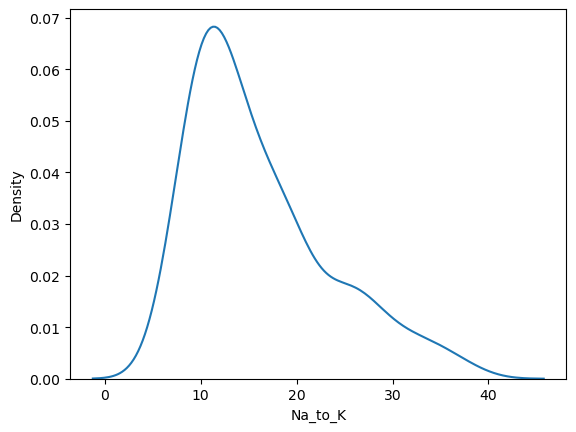

In [24]:
for i in data.columns:
    if data[i].dtype!='object':
        sns.kdeplot(x=data[i])
        plt.show()

## BOXPLOT

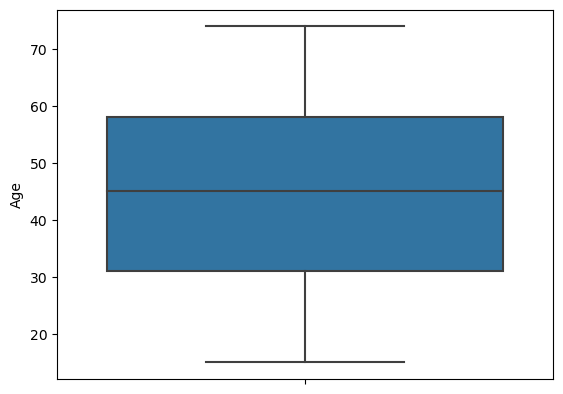

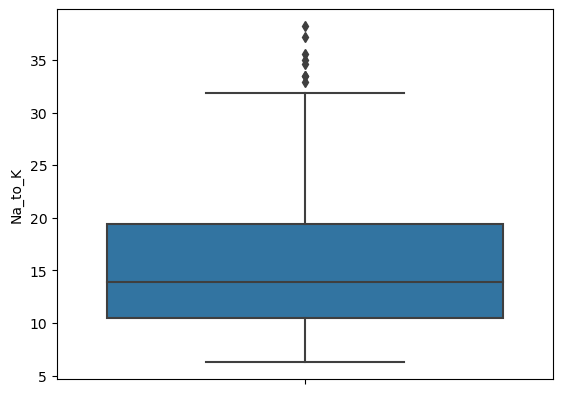

In [25]:
for i in data.columns:
    if data[i].dtype!='object':
        sns.boxplot(y=data[i])
        plt.show()

# <CENTER>MULTIVARIATE ANALYSIS

## PIE CHART 

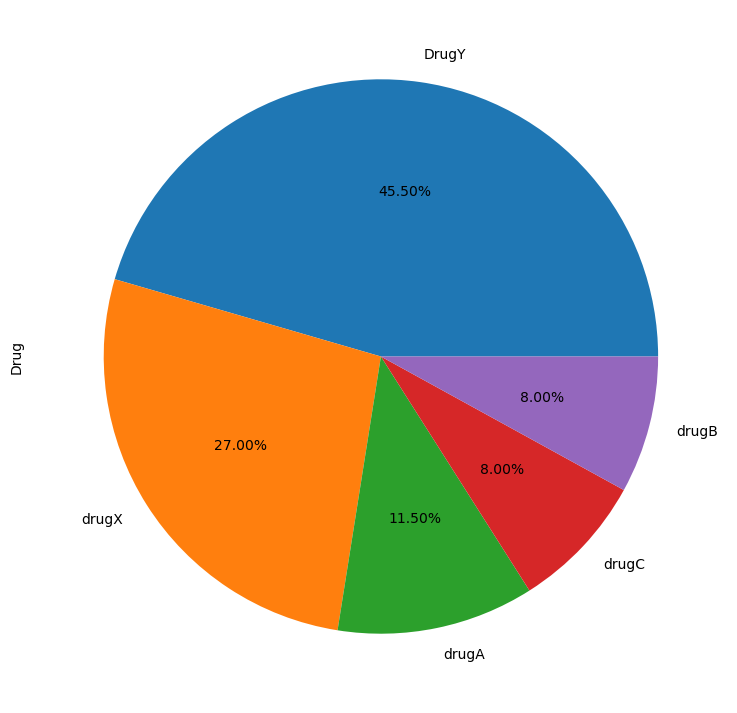

In [29]:
plt.figure(figsize=(9,9))
data.Drug.value_counts().plot.pie(autopct = '%1.2f%%');

## PAIRPLOT

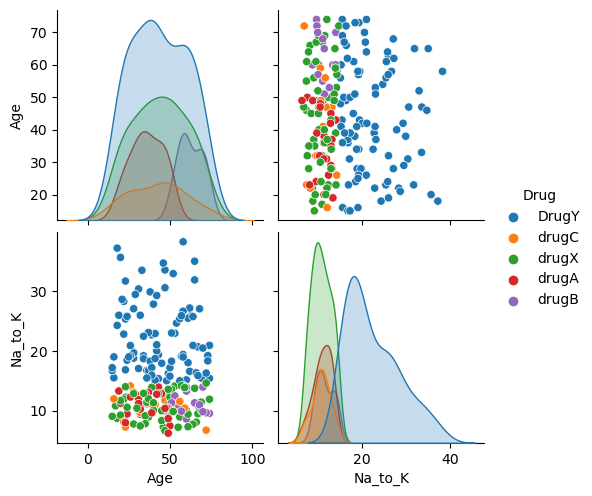

In [28]:
sns.pairplot(data,hue="Drug")

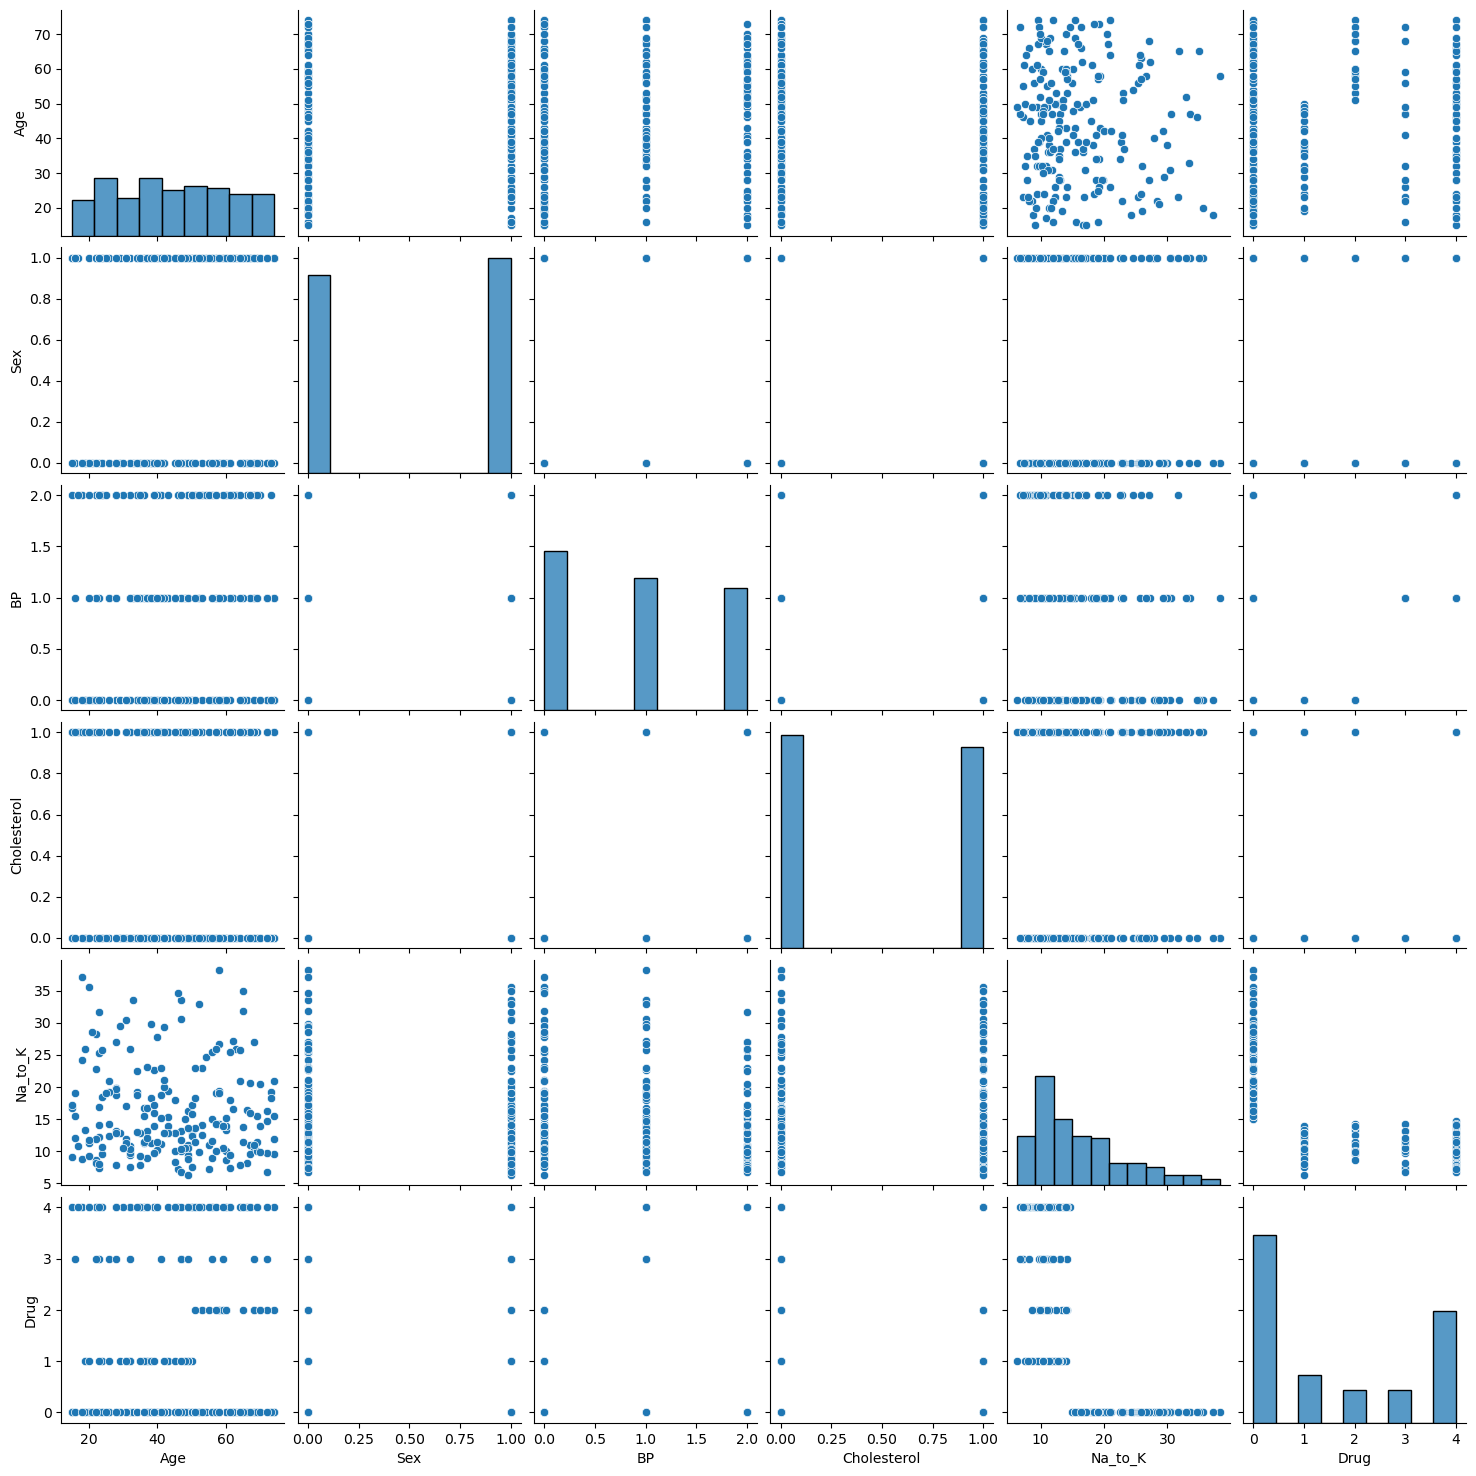

In [62]:
sns.pairplot(data=data)
plt.show();

## BARPLOT

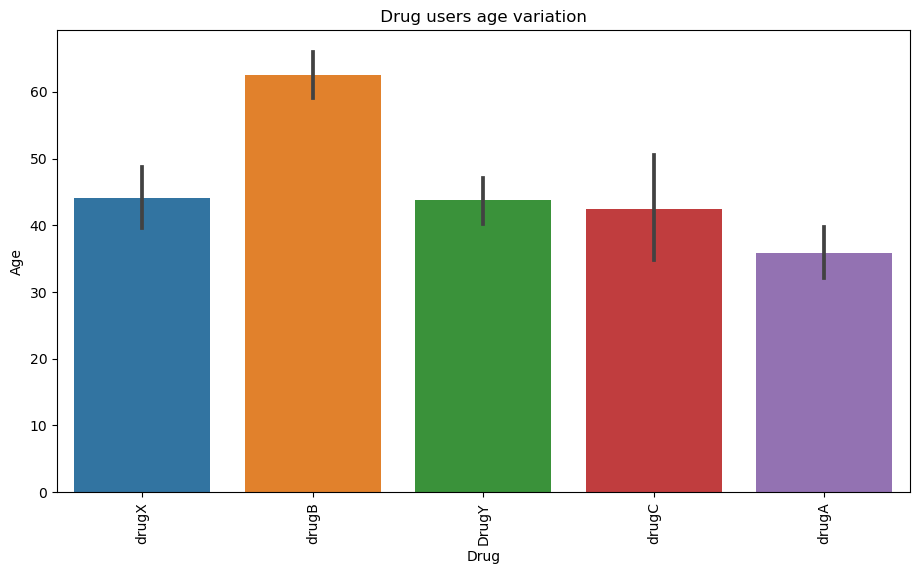

In [34]:
plt.figure(figsize=(11,6))
sns.barplot(x='Drug',y='Age',data=data.sort_values(by='Age',ascending=False)[:300])
plt.xticks(rotation=90)
plt.title(' Drug users age variation ')
plt.show()

## SCATTERPLOT

Text(0, 0.5, 'Y-axis variable')

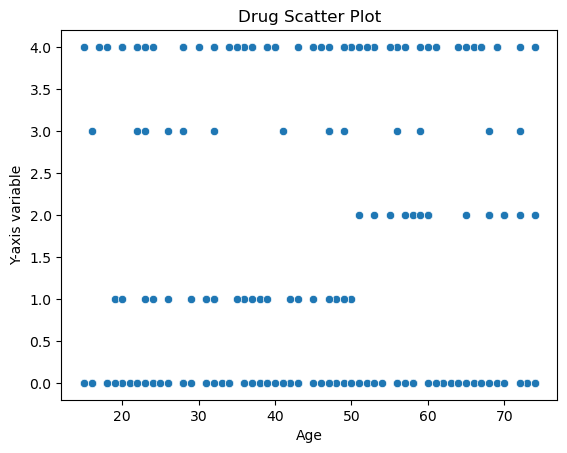

In [59]:
sns.scatterplot(data=data, x='Age', y='Drug')


plt.title("Drug Scatter Plot")
plt.xlabel("Age")
plt.ylabel("Y-axis variable")

## HEAT MAP

<AxesSubplot:>

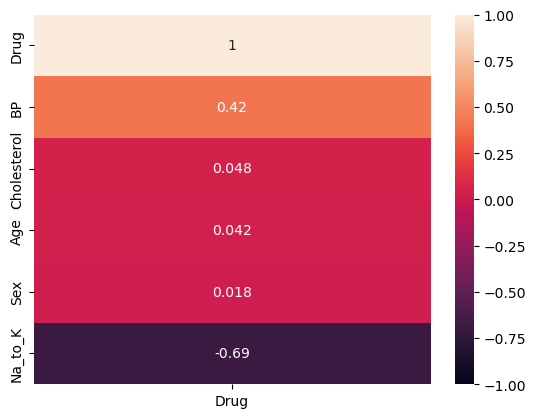

In [61]:
sns.heatmap(data.corr()[['Drug']].sort_values(by='Drug',ascending=False),vmax=1,vmin=-1,annot=True)

### LABEL ENCODING THE OBJECT TYPE COLUMNS

In [ ]:
col=["Sex","BP","Cholesterol","Drug"]
le=LabelEncoder()

In [36]:
data[col]=data[col].apply(le.fit_transform)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int32  
 2   BP           200 non-null    int32  
 3   Cholesterol  200 non-null    int32  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int32  
dtypes: float64(1), int32(4), int64(1)
memory usage: 6.4 KB


In [38]:
x=data.iloc[:,:-1].values

In [39]:
y=data.iloc[:,-1].values

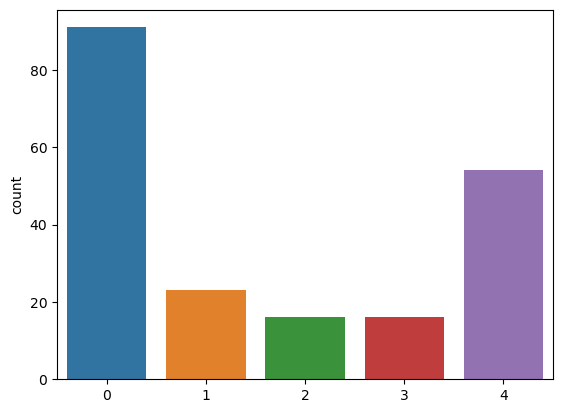

In [40]:
sns.countplot(x=y);

### WE CAN SEE THAT THE TARGET DATA IS NOT BALANCED

### INITIALISING THE SAMPLER

In [41]:
over_sampler=SMOTE()

In [42]:
x, y = over_sampler.fit_resample(x,y)

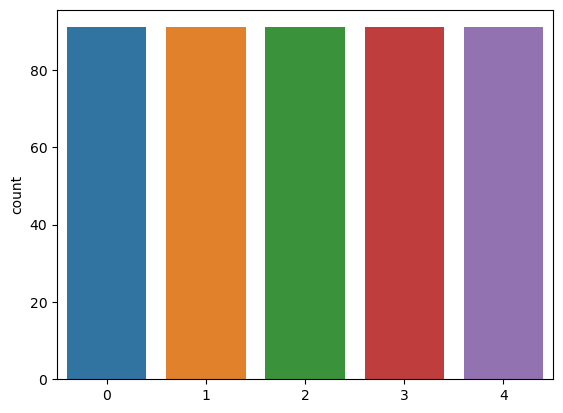

In [43]:
sns.countplot(x=y);

### WE CAN SEE THAT NOW THE DATA IS BALANCED

In [44]:
data['Drug'].unique()

array([0, 3, 4, 1, 2])

In [45]:
sc=StandardScaler()

In [46]:
x=sc.fit_transform(x)

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [48]:
model=RandomForestClassifier()

In [49]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
print("*"*60)

model trained with RandomForestClassifier()
Model accuracy on train is::  1.0
Model accuracy on test is::  1.0
confusion_matrix train is::  [[73  0  0  0  0]
 [ 0 70  0  0  0]
 [ 0  0 73  0  0]
 [ 0  0  0 74  0]
 [ 0  0  0  0 74]]
confusion_matrix test is::  [[18  0  0  0  0]
 [ 0 21  0  0  0]
 [ 0  0 18  0  0]
 [ 0  0  0 17  0]
 [ 0  0  0  0 17]]
Wrong Predictions made: 0 / 91
************************************************************


## PREDICTING Y

In [50]:
OUTPUT=pd.DataFrame(zip(y,model.predict(x)),columns=("ACTUAL","PREDICTION"),dtype=int)

In [51]:
OUTPUT.sample(15)

,ACTUAL,PREDICTION
249,1,1
67,4,4
205,1,1
391,3,3
45,4,4
176,1,1
121,0,0
104,0,0
6,0,0
206,1,1


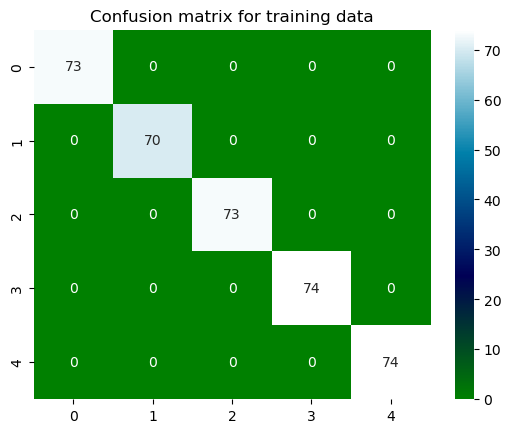

In [52]:
plt.title("Confusion matrix for training data")
sns.heatmap(con_train,annot=True,cmap='ocean');

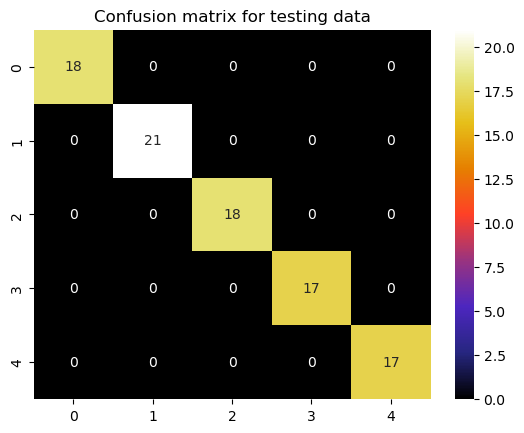

In [53]:
plt.title("Confusion matrix for testing data")
sns.heatmap(con_test, annot=True, cmap='CMRmap');

## WE HAVE TO BINARISE THE TARGET

In [54]:
y = label_binarize(y, classes=[0,1,2,3,4])
n_classes =5

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

# <CENTER>ALTERNATIVE METHOD 

## USING RANDOMFOREST CLASSIFIER 

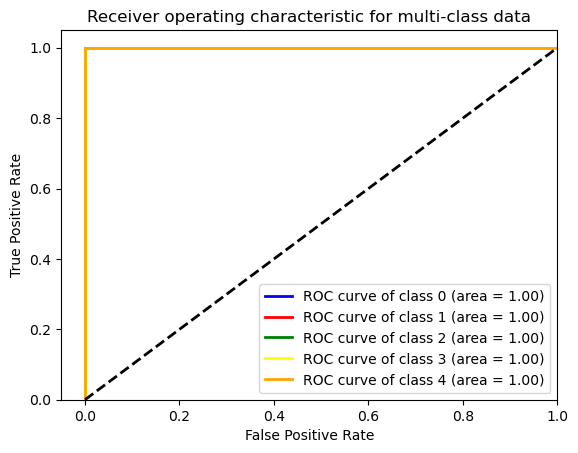

In [57]:
classifier = OneVsRestClassifier(RandomForestClassifier(random_state=0))
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'yellow', 'orange', 'pink'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()